🎯 GENERANDO PERFIL COMPLETO DE DATOS DE MOVILIDAD
🚀 Cargando datos...
   Probando encoding: utf-8 con separador: ','
   Probando encoding: utf-8 con separador: ';'
   Probando encoding: utf-8 con separador: '	'
   Probando encoding: utf-8 con separador: '|'
   Probando encoding: latin1 con separador: ','
   ❌ Solo 1 columna detectada con separador ','
   Probando encoding: latin1 con separador: ';'
✅ Datos cargados exitosamente con encoding latin1 y separador ';'
   15,237 registros, 21 columnas
   Columnas detectadas: ['IdHogar', 'IdPersona', 'IdViaje', 'Edad', 'NivelEducativo', 'Sexo', 'Barrio', 'Estrato', 'CantidadHogares', 'TotalPersonas']

🔧 CORRIGIENDO TIPOS DE DATOS...
   ✅ IdHogar convertida a numérica
   ✅ IdPersona convertida a numérica
   ✅ IdViaje convertida a numérica
   ✅ Edad convertida a numérica
   ✅ Estrato convertida a numérica
   ✅ CantidadHogares convertida a numérica
   ✅ TotalPersonas convertida a numérica
   ✅ TotalVehiculos convertida a numérica
   ✅ NivelEduca

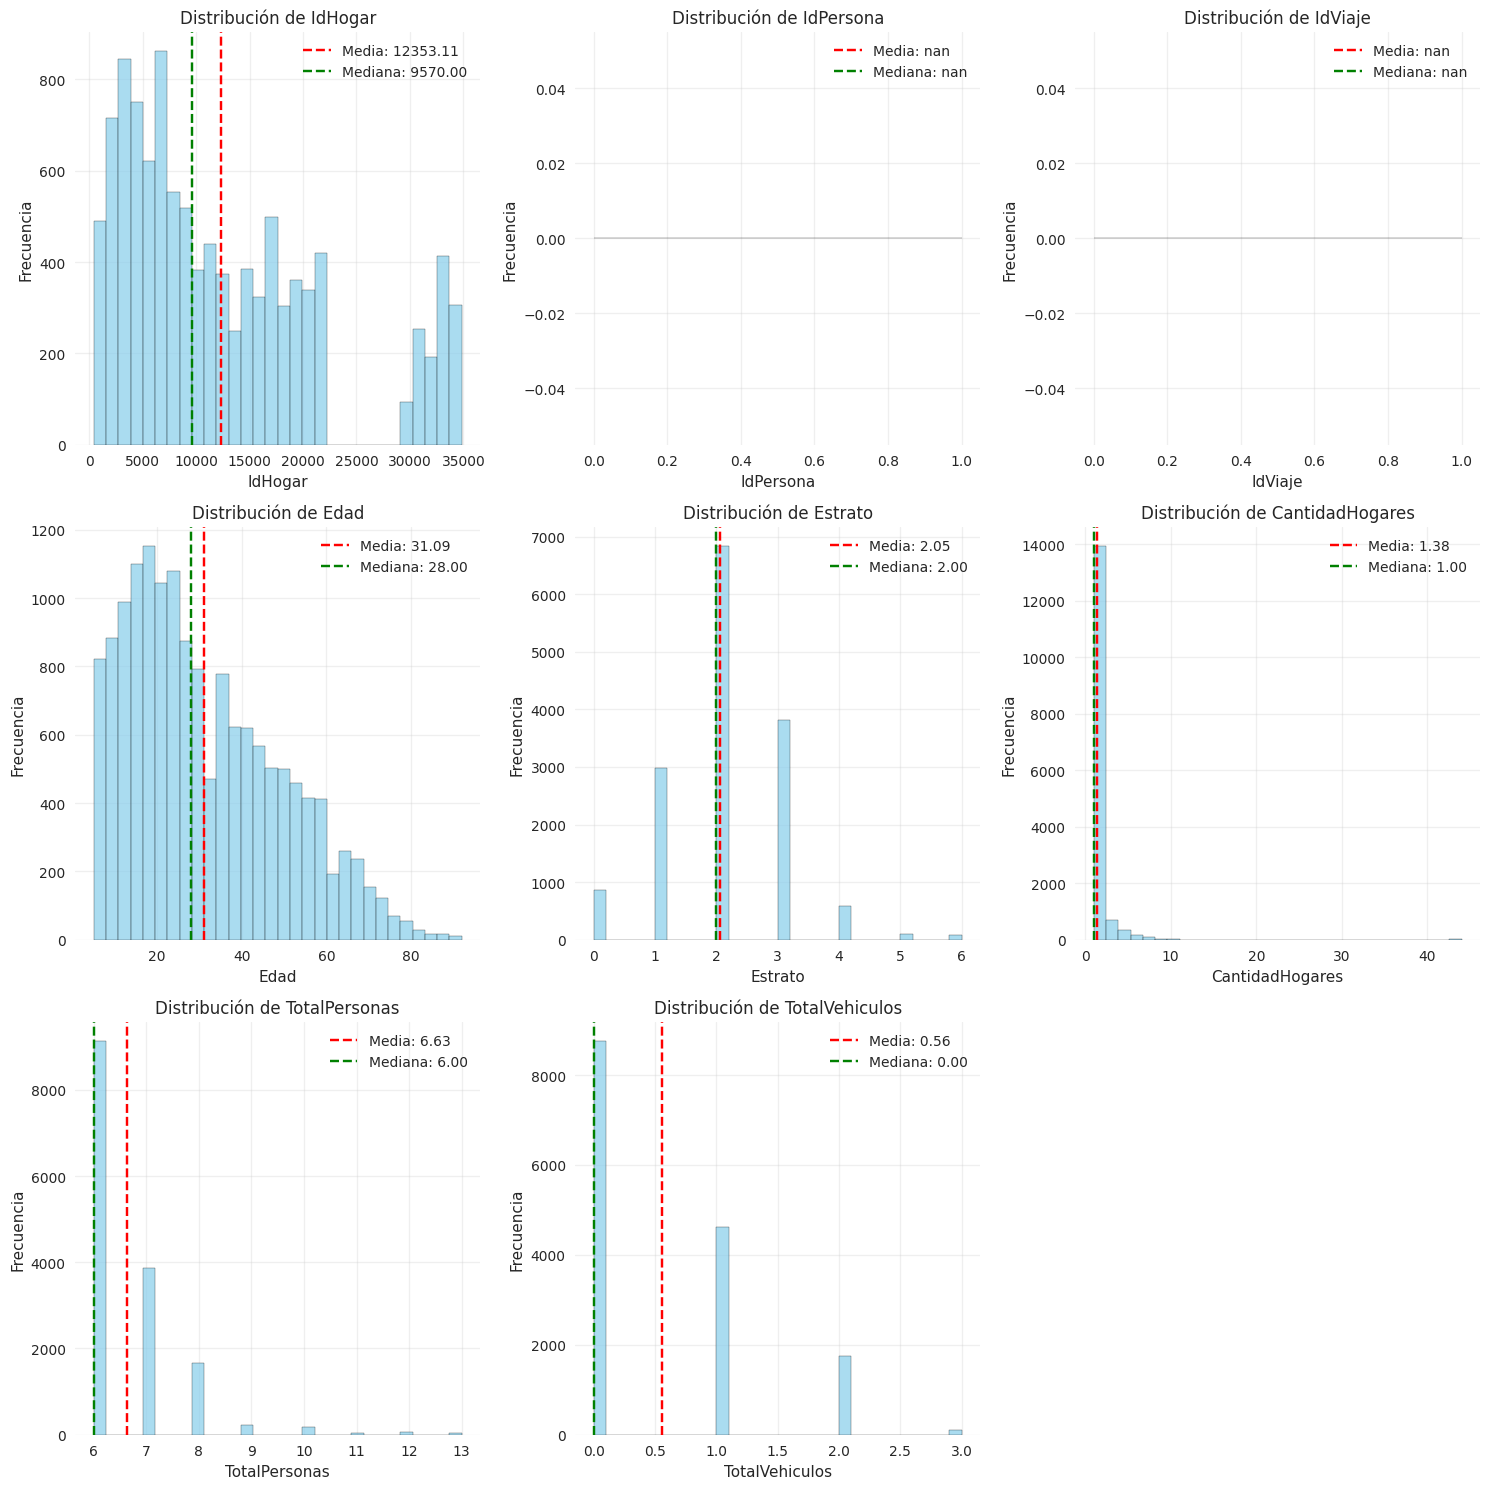

✅ Histogramas generados

📊 GRÁFICOS - VARIABLES CATEGÓRICAS


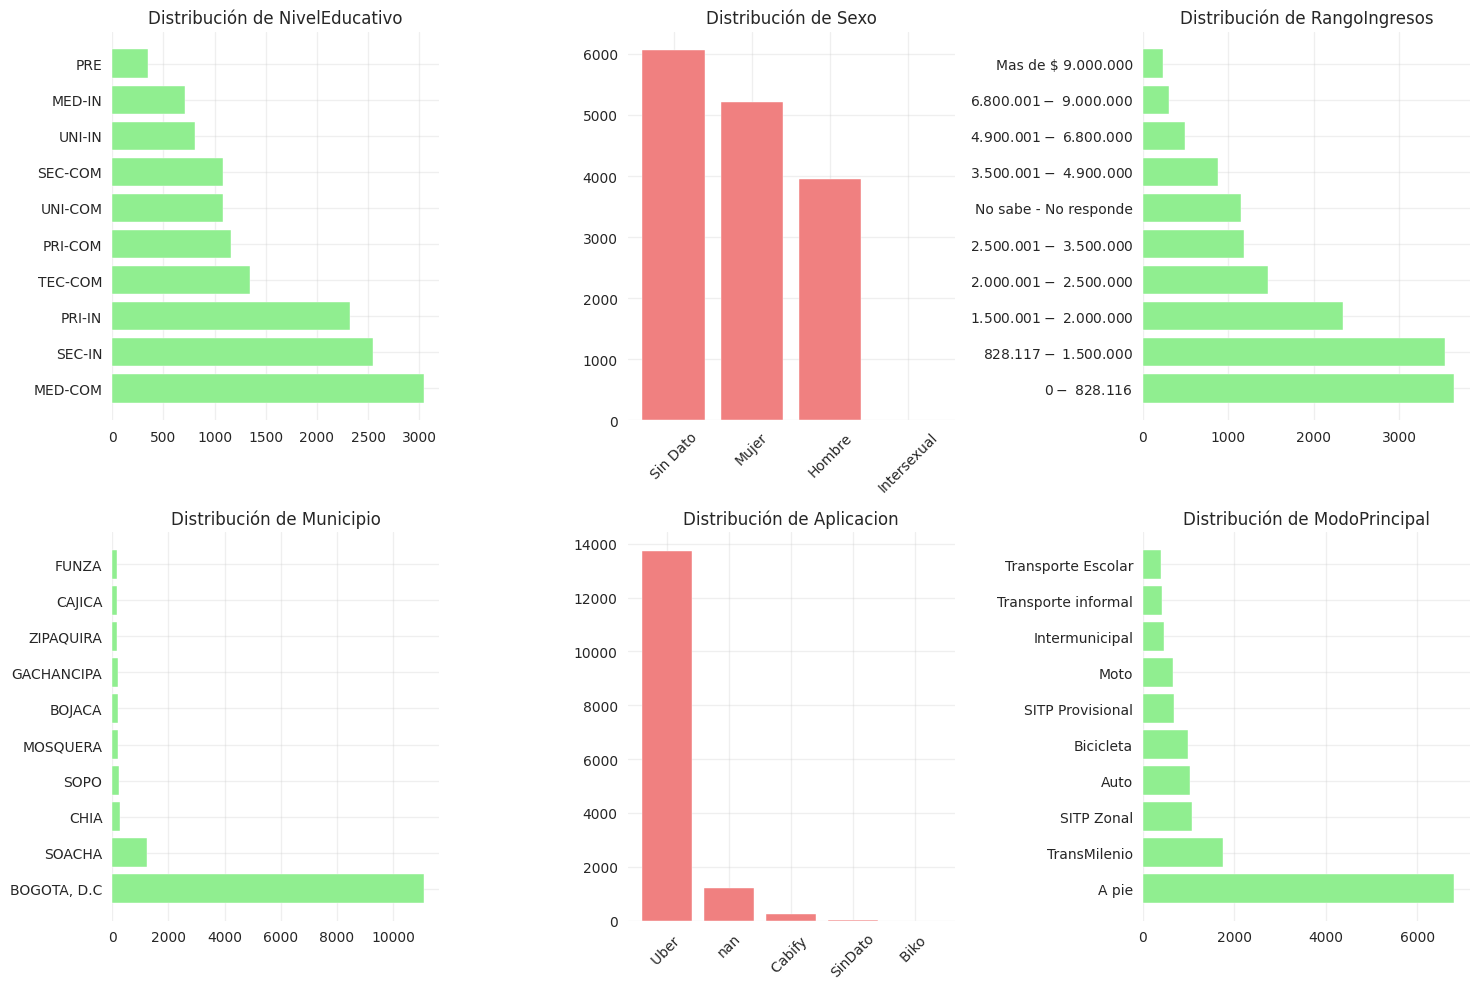

✅ Gráficos categóricos generados

🔗 ANÁLISIS DE CORRELACIÓN

📊 MATRIZ DE CORRELACIÓN:
                 IdHogar  IdPersona  IdViaje   Edad  Estrato  CantidadHogares  \
IdHogar            1.000        NaN      NaN -0.044   -0.041           -0.021   
IdPersona            NaN        NaN      NaN    NaN      NaN              NaN   
IdViaje              NaN        NaN      NaN    NaN      NaN              NaN   
Edad              -0.044        NaN      NaN  1.000    0.123           -0.034   
Estrato           -0.041        NaN      NaN  0.123    1.000            0.008   
CantidadHogares   -0.021        NaN      NaN -0.034    0.008            1.000   
TotalPersonas      0.001        NaN      NaN -0.035   -0.036            0.029   
TotalVehiculos     0.013        NaN      NaN  0.090    0.189           -0.053   

                 TotalPersonas  TotalVehiculos  
IdHogar                  0.001           0.013  
IdPersona                  NaN             NaN  
IdViaje                    NaN       

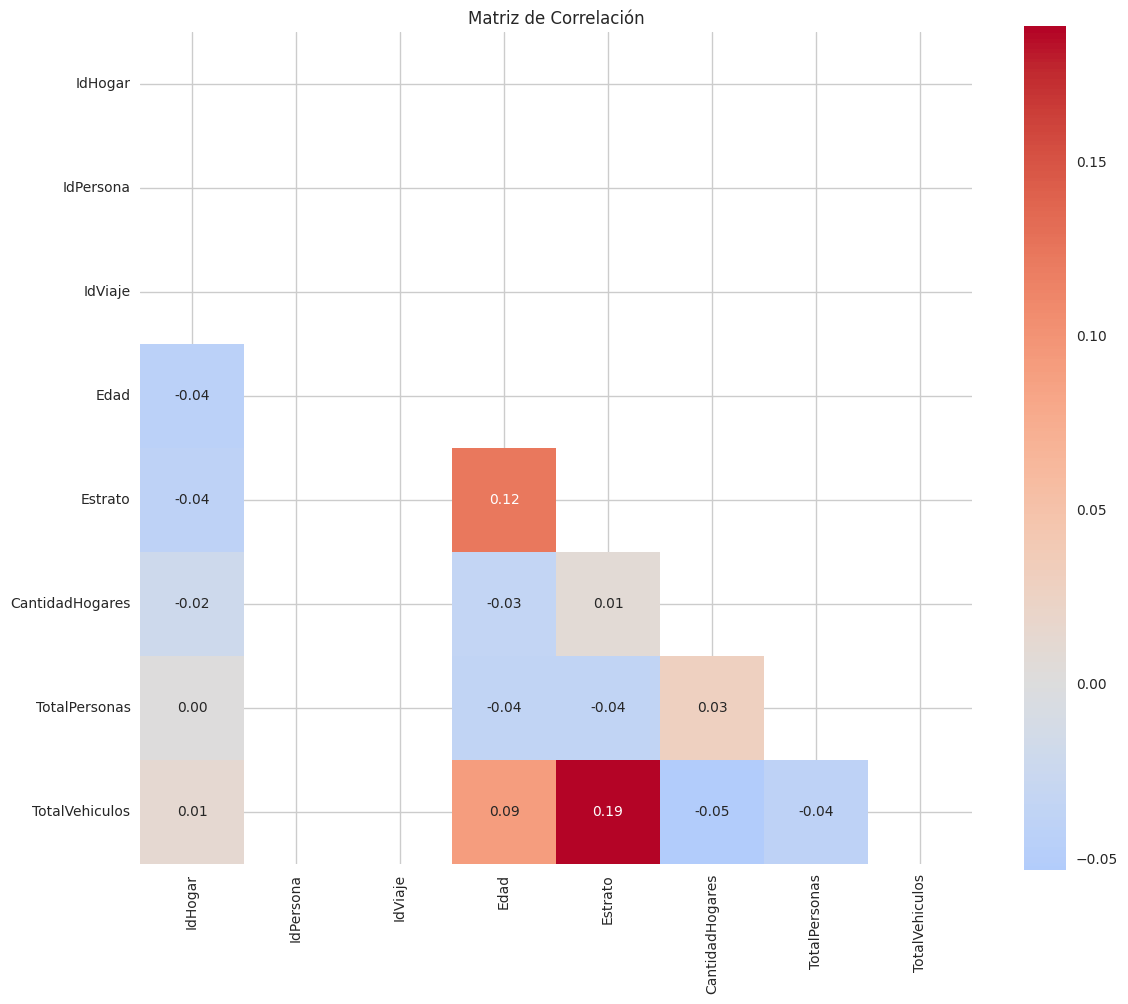


🔥 CORRELACIONES MÁS FUERTES (|r| > 0.5):
   No se encontraron correlaciones fuertes

🚗 ANÁLISIS ESPECÍFICO DE MOVILIDAD

🚌 ANÁLISIS POR MODO DE TRANSPORTE:
ModoPrincipal
A pie                            6815
TransMilenio                     1753
SITP Zonal                       1074
Auto                             1040
Bicicleta                         990
SITP Provisional                  672
Moto                              652
Intermunicipal                    461
Transporte informal               428
Transporte Escolar                406
Transporte publico individual     362
Alimentador                       317
Otro                              242
Bicitaxi                           18
Patineta                            6
Cable                               1
Name: count, dtype: int64


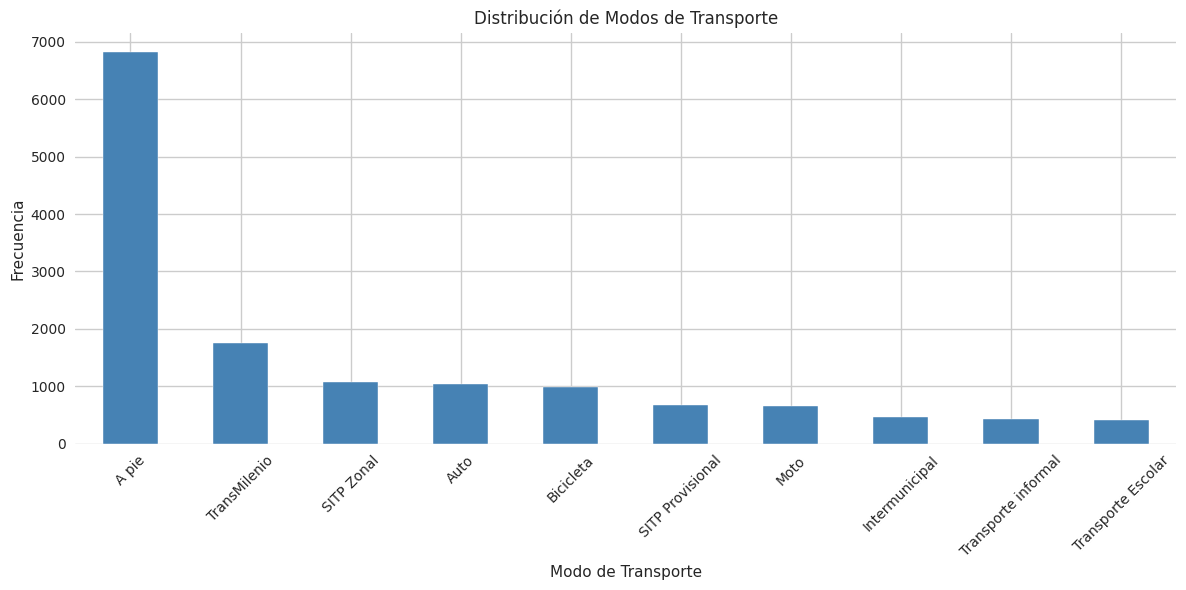


🏠 ANÁLISIS POR ESTRATO:
Estrato
0     871
1    2978
2    6829
3    3809
4     584
5      91
6      75
Name: count, dtype: int64


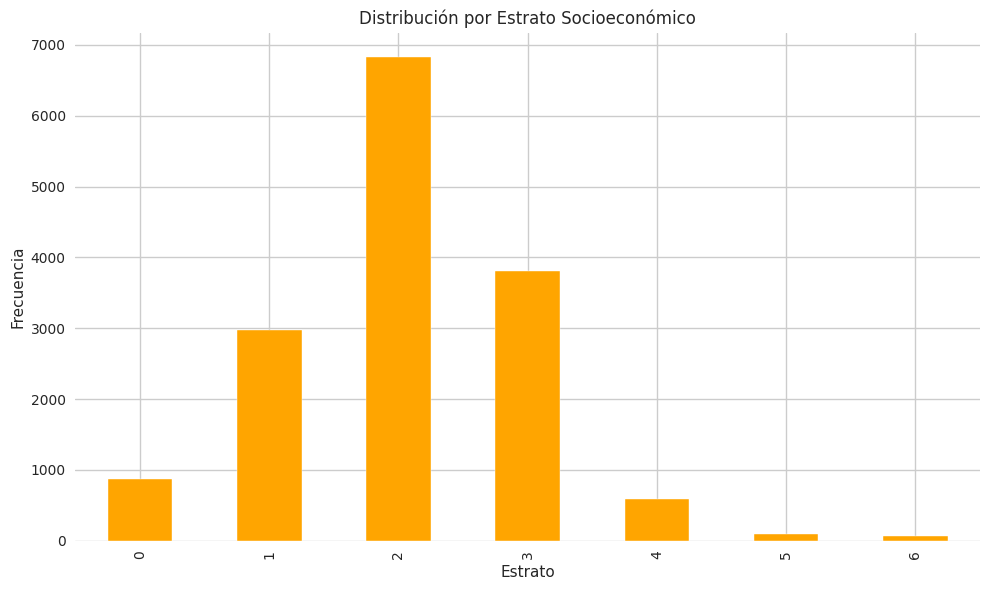


🗺️ ANÁLISIS GEOGRÁFICO:
Top 10 municipios:
Municipio
BOGOTA, D.C    11083
SOACHA          1255
CHIA             275
SOPO             253
MOSQUERA         206
BOJACA           199
GACHANCIPA       193
ZIPAQUIRA        192
CAJICA           190
FUNZA            187
Name: count, dtype: int64

✅ PERFIL COMPLETO GENERADO EXITOSAMENTE

💾 Dataset cargado y analizado: 15,237 registros
🎉 ¡Análisis completo terminado!


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

def load_data_with_encoding(file_path):
    """
    Carga datos probando diferentes encodings y separadores
    """
    print("🚀 Cargando datos...")

    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'utf-16']
    separators = [',', ';', '\t', '|']  # Diferentes separadores posibles

    for encoding in encodings:
        for sep in separators:
            try:
                print(f"   Probando encoding: {encoding} con separador: '{sep}'")
                df = pd.read_csv(file_path, encoding=encoding, sep=sep)

                # Verificar si la lectura fue exitosa (más de 1 columna)
                if df.shape[1] > 1:
                    print(f"✅ Datos cargados exitosamente con encoding {encoding} y separador '{sep}'")
                    print(f"   {df.shape[0]:,} registros, {df.shape[1]} columnas")

                    # Mostrar las primeras columnas detectadas
                    print(f"   Columnas detectadas: {list(df.columns[:10])}")

                    # Corregir tipos de datos automáticamente
                    df = fix_data_types(df)

                    return df
                else:
                    print(f"   ❌ Solo 1 columna detectada con separador '{sep}'")

            except UnicodeDecodeError:
                continue
            except Exception as e:
                print(f"   Error con {encoding} y separador '{sep}': {e}")
                continue

    print("❌ No se pudo cargar el archivo con ninguna combinación de encoding/separador")
    return None

def fix_data_types(df):
    """
    Corrige automáticamente los tipos de datos
    """
    print(f"\n🔧 CORRIGIENDO TIPOS DE DATOS...")

    # Columnas que deberían ser numéricas
    numeric_columns = ['IdHogar', 'IdPersona', 'IdViaje', 'Edad', 'Estrato',
                      'CantidadHogares', 'TotalPersonas', 'TotalVehiculos']

    # Columnas que deberían ser categóricas
    categorical_columns = ['NivelEducativo', 'Sexo', 'Barrio', 'RangoIngresos',
                          'Municipio', 'Aplicacion', 'ModoPrincipal', 'Localidad',
                          'TipoVehiculo', 'DesplazamientoOrigen', 'DesplazamientoDestino']

    # Convertir columnas numéricas
    for col in numeric_columns:
        if col in df.columns:
            try:
                # Intentar conversión directa
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"   ✅ {col} convertida a numérica")
            except:
                # Si falla, limpiar y convertir
                df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"   ✅ {col} limpiada y convertida a numérica")

    # Convertir columnas categóricas
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)
            print(f"   ✅ {col} convertida a categórica")

    # Mostrar resultado final
    print(f"\n📊 TIPOS DE DATOS FINALES:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print(f"   Variables numéricas ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"   Variables categóricas ({len(categorical_cols)}): {list(categorical_cols)}")

    return df

def basic_info(df):
    """
    Información básica del dataset
    """
    print("\n" + "="*80)
    print("📊 INFORMACIÓN BÁSICA DEL DATASET")
    print("="*80)

    print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Registros duplicados: {df.duplicated().sum():,}")

    print("\n🔍 PRIMERAS 5 FILAS:")
    print(df.head())

    print("\n📋 TIPOS DE DATOS:")
    print(df.dtypes)

    # Verificar detección de tipos
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print(f"\n🔢 Variables numéricas detectadas ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"🏷️ Variables categóricas detectadas ({len(categorical_cols)}): {list(categorical_cols)}")

    print("\n❓ VALORES FALTANTES:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Columna': missing.index,
        'Valores_Faltantes': missing.values,
        'Porcentaje': missing_pct.values
    })
    print(missing_df[missing_df['Valores_Faltantes'] > 0])

    # Mostrar ejemplos de datos para verificar
    print("\n🔍 MUESTRA DE DATOS POR COLUMNA:")
    for col in df.columns:
        print(f"{col}: {df[col].dropna().iloc[0] if not df[col].dropna().empty else 'Sin datos'} (tipo: {df[col].dtype})")

def descriptive_statistics(df):
    """
    Estadística descriptiva completa
    """
    print("\n" + "="*80)
    print("📈 ESTADÍSTICA DESCRIPTIVA")
    print("="*80)

    # Variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("\n🔢 VARIABLES NUMÉRICAS:")
        desc_stats = df[numeric_cols].describe()
        print(desc_stats)

        # Estadísticas adicionales
        print("\n📊 ESTADÍSTICAS ADICIONALES:")
        additional_stats = pd.DataFrame({
            'Asimetría': df[numeric_cols].skew(),
            'Curtosis': df[numeric_cols].kurtosis(),
            'Coef_Variación': df[numeric_cols].std() / df[numeric_cols].mean()
        })
        print(additional_stats)

    # Variables categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print("\n🏷️ VARIABLES CATEGÓRICAS:")
        for col in categorical_cols:
            print(f"\n--- {col} ---")
            value_counts = df[col].value_counts()
            print(f"Valores únicos: {df[col].nunique()}")
            print("Top 10 valores:")
            print(value_counts.head(10))
            print(f"Porcentajes:")
            print((value_counts.head(10) / len(df) * 100).round(2))

def create_histograms(df):
    """
    Crea histogramas para todas las variables numéricas
    """
    print("\n" + "="*80)
    print("📊 HISTOGRAMAS - VARIABLES NUMÉRICAS")
    print("="*80)

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) == 0:
        print("No hay variables numéricas para graficar")
        return

    # Calcular número de subplots
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Histograma
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            axes[i].grid(True, alpha=0.3)

            # Añadir estadísticas básicas
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
            axes[i].legend()

    # Ocultar subplots vacíos
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
    print("✅ Histogramas generados")

def create_categorical_plots(df):
    """
    Crea gráficos para variables categóricas
    """
    print("\n" + "="*80)
    print("📊 GRÁFICOS - VARIABLES CATEGÓRICAS")
    print("="*80)

    categorical_cols = df.select_dtypes(include=['object']).columns

    if len(categorical_cols) == 0:
        print("No hay variables categóricas para graficar")
        return

    # Seleccionar las variables categóricas más importantes
    important_cats = []
    for col in categorical_cols:
        if df[col].nunique() <= 20:  # Solo variables con menos de 20 categorías
            important_cats.append(col)

    if len(important_cats) == 0:
        print("No hay variables categóricas apropiadas para graficar")
        return

    # Crear gráficos
    n_plots = min(6, len(important_cats))  # Máximo 6 gráficos
    n_cols = min(3, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(important_cats[:n_plots]):
        value_counts = df[col].value_counts().head(10)

        if len(value_counts) <= 5:
            # Gráfico de barras vertical
            axes[i].bar(range(len(value_counts)), value_counts.values, color='lightcoral')
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45)
        else:
            # Gráfico de barras horizontal
            axes[i].barh(range(len(value_counts)), value_counts.values, color='lightgreen')
            axes[i].set_yticks(range(len(value_counts)))
            axes[i].set_yticklabels(value_counts.index)

        axes[i].set_title(f'Distribución de {col}')
        axes[i].grid(True, alpha=0.3)

    # Ocultar subplots vacíos
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
    print("✅ Gráficos categóricos generados")

def correlation_analysis(df):
    """
    Análisis de correlación
    """
    print("\n" + "="*80)
    print("🔗 ANÁLISIS DE CORRELACIÓN")
    print("="*80)

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) < 2:
        print("Se necesitan al menos 2 variables numéricas para el análisis de correlación")
        return

    # Matriz de correlación
    correlation_matrix = df[numeric_cols].corr()
    print("\n📊 MATRIZ DE CORRELACIÓN:")
    print(correlation_matrix.round(3))

    # Visualización de la matriz de correlación
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                mask=mask,
                square=True,
                fmt='.2f')
    plt.title('Matriz de Correlación')
    plt.tight_layout()
    plt.show()

    # Correlaciones más fuertes
    print("\n🔥 CORRELACIONES MÁS FUERTES (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))

    if strong_corr:
        for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"   {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("   No se encontraron correlaciones fuertes")

def mobility_specific_analysis(df):
    """
    Análisis específico para datos de movilidad
    """
    print("\n" + "="*80)
    print("🚗 ANÁLISIS ESPECÍFICO DE MOVILIDAD")
    print("="*80)

    # Análisis por modo de transporte
    if 'ModoPrincipal' in df.columns:
        print("\n🚌 ANÁLISIS POR MODO DE TRANSPORTE:")
        modo_stats = df['ModoPrincipal'].value_counts()
        print(modo_stats)

        # Gráfico de modo de transporte
        plt.figure(figsize=(12, 6))
        modo_stats.head(10).plot(kind='bar', color='steelblue')
        plt.title('Distribución de Modos de Transporte')
        plt.xlabel('Modo de Transporte')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Análisis por estrato socioeconómico
    if 'Estrato' in df.columns:
        print("\n🏠 ANÁLISIS POR ESTRATO:")
        estrato_stats = df['Estrato'].value_counts().sort_index()
        print(estrato_stats)

        # Gráfico de estrato
        plt.figure(figsize=(10, 6))
        estrato_stats.plot(kind='bar', color='orange')
        plt.title('Distribución por Estrato Socioeconómico')
        plt.xlabel('Estrato')
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

    # Análisis geográfico
    if 'Municipio' in df.columns:
        print("\n🗺️ ANÁLISIS GEOGRÁFICO:")
        municipio_stats = df['Municipio'].value_counts().head(10)
        print("Top 10 municipios:")
        print(municipio_stats)

def generate_complete_profile(file_path):
    """
    Genera el perfil completo de datos
    """
    print("🎯 GENERANDO PERFIL COMPLETO DE DATOS DE MOVILIDAD")
    print("="*80)

    # Cargar datos
    df = load_data_with_encoding(file_path)
    if df is None:
        return None

    # Ejecutar todos los análisis
    basic_info(df)
    descriptive_statistics(df)
    create_histograms(df)
    create_categorical_plots(df)
    correlation_analysis(df)
    mobility_specific_analysis(df)

    print("\n" + "="*80)
    print("✅ PERFIL COMPLETO GENERADO EXITOSAMENTE")
    print("="*80)

    return df

# Ejecutar el análisis completo
if __name__ == "__main__":
    file_path = '/content/Cluster0_Vf.csv'
    datos = generate_complete_profile(file_path)

    if datos is not None:
        print(f"\n💾 Dataset cargado y analizado: {datos.shape[0]:,} registros")
        print("🎉 ¡Análisis completo terminado!")
    else:
        print("❌ No se pudo completar el análisis")

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cargar datos - probando diferentes encodings
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252', 'utf-16']

df = None
for encoding in encodings:
    try:
        # Intentar con separador de punto y coma
        df = pd.read_csv('/content/Cluster0_Vf.csv', encoding=encoding, sep=';')
        print(f"Archivo cargado exitosamente con encoding: {encoding} y separador ';'")
        break
    except UnicodeDecodeError:
        print(f"Falló con encoding: {encoding}")
        continue
    except Exception as e:
        print(f"Error con encoding {encoding}: {e}")
        continue

if df is None:
    print("No se pudo cargar el archivo con ningún encoding. Intentando con errors='ignore'")
    df = pd.read_csv('/content/Cluster0_Vf.csv', encoding='utf-8', errors='ignore', sep=';')

print("INFORMACIÓN DEL DATASET:")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas disponibles: {list(df.columns)}")
print("\nPrimeras filas:")
print(df.head())

print("\nTipos de datos:")
print(df.dtypes)

print("\nInformación de columnas:")
print(df.info())

# Buscar columna que contenga información sobre modo de transporte
modo_columns = [col for col in df.columns if 'modo' in col.lower() or 'transport' in col.lower() or 'principal' in col.lower()]
print(f"\nColumnas relacionadas con modo de transporte: {modo_columns}")

# Mostrar valores únicos de las columnas categóricas para identificar la variable de transporte
print("\nValores únicos en columnas categóricas (primeros 20):")
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals[:20] if len(unique_vals) > 20 else unique_vals}")

# Intentar encontrar la columna correcta para modo de transporte
transport_col = None
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        # Buscar valores que contengan "informal" o "transporte"
        for val in unique_vals:
            if isinstance(val, str) and ('informal' in val.lower() or 'transmilenio' in val.lower() or 'sitp' in val.lower()):
                transport_col = col
                break
        if transport_col:
            break

if transport_col:
    print(f"\nColumna identificada para modo de transporte: {transport_col}")
    print(f"Valores únicos en {transport_col}:")
    print(df[transport_col].value_counts())

    # Crear variable dependiente binaria
    df['TransporteInformal'] = (df[transport_col].str.contains('informal', case=False, na=False)).astype(int)
else:
    print("\nNo se pudo identificar automáticamente la columna de modo de transporte.")
    print("Buscando columna 'ModoPrincipal' específicamente...")

    # Buscar directamente la columna ModoPrincipal
    if 'ModoPrincipal' in df.columns:
        print("Columna 'ModoPrincipal' encontrada!")
        print(f"Valores únicos en ModoPrincipal:")
        print(df['ModoPrincipal'].value_counts())

        # Crear variable dependiente binaria
        df['TransporteInformal'] = (df['ModoPrincipal'].str.contains('informal', case=False, na=False)).astype(int)
    else:
        print("Columna 'ModoPrincipal' no encontrada en el dataset.")
        print("Columnas disponibles:", df.columns.tolist())

print(f"\nDistribución de la variable dependiente:")
if 'TransporteInformal' in df.columns:
    print(df['TransporteInformal'].value_counts())
    print(f"Proporción de transporte informal: {df['TransporteInformal'].mean():.4f}")
else:
    print("No se pudo crear la variable dependiente 'TransporteInformal'")
    print("Terminando análisis...")
    exit()

# Análisis descriptivo por transporte informal
print("\n" + "="*50)
print("ANÁLISIS DESCRIPTIVO POR TIPO DE TRANSPORTE")
print("="*50)

# Variables numéricas
vars_numericas = ['Edad', 'Estrato', 'CantidadHogares', 'TotalPersonas', 'TotalVehiculos']
for var in vars_numericas:
    if var in df.columns:
        print(f"\n{var}:")
        print(df.groupby('TransporteInformal')[var].describe())

# Variables categóricas
vars_categoricas = ['NivelEducativo', 'Sexo', 'RangoIngresos', 'Municipio', 'Localidad']
for var in vars_categoricas:
    if var in df.columns:
        print(f"\n{var}:")
        crosstab = pd.crosstab(df[var], df['TransporteInformal'], margins=True)
        print(crosstab)

# Preparar datos para modelado
print("\n" + "="*50)
print("PREPARACIÓN DE DATOS PARA MODELADO")
print("="*50)

# Crear copias para no modificar el original
df_model = df.copy()

# Codificar variables categóricas
le_dict = {}
categorical_vars = []

for col in df_model.select_dtypes(include=['object']).columns:
    if col != 'ModoPrincipal':  # Excluir la variable original de modo
        le_dict[col] = LabelEncoder()
        df_model[col + '_encoded'] = le_dict[col].fit_transform(df_model[col].astype(str))
        categorical_vars.append(col + '_encoded')

# Variables para el modelo - verificar que existan
available_vars = []
for var in ['Edad', 'Estrato', 'CantidadHogares', 'TotalPersonas', 'TotalVehiculos']:
    if var in df.columns:
        available_vars.append(var)
        print(f"Variable encontrada: {var}")
    else:
        print(f"Variable NO encontrada: {var}")

print(f"\nVariables numéricas disponibles: {available_vars}")

# Crear variables codificadas solo para las que existen
categorical_vars = []
for col in df.select_dtypes(include=['object']).columns:
    if col not in ['ModoPrincipal']:  # Excluir la variable original de modo
        try:
            le_dict[col] = LabelEncoder()
            df[col + '_encoded'] = le_dict[col].fit_transform(df[col].astype(str))
            categorical_vars.append(col + '_encoded')
        except Exception as e:
            print(f"Error codificando {col}: {e}")

print(f"Variables categóricas codificadas: {categorical_vars}")

# Variables para el modelo
numeric_vars = available_vars
all_vars = numeric_vars + categorical_vars

print(f"Total variables para el modelo: {len(all_vars)}")
print(f"Variables: {all_vars}")

# Verificar si tenemos variables para el modelo
if len(all_vars) == 0:
    print("No hay variables disponibles para el modelo. Revisando estructura del dataset...")
    print("Columnas disponibles:", df.columns.tolist())
    print("Tipos de datos:")
    print(df.dtypes)

# Remover filas con valores faltantes
df_clean = df_model[all_vars + ['TransporteInformal']].dropna()

print(f"Datos después de limpiar: {df_clean.shape}")
print(f"Variables explicativas: {len(all_vars)}")

# MODELO 1: Probit con todas las variables
print("\n" + "="*50)
print("MODELO 1: PROBIT COMPLETO")
print("="*50)

X1 = df_clean[all_vars]
y = df_clean['TransporteInformal']

# Agregar constante
X1_const = sm.add_constant(X1)

# Ajustar modelo probit
try:
    probit_model1 = Probit(y, X1_const)
    probit_result1 = probit_model1.fit(disp=0)
    print(probit_result1.summary())
except Exception as e:
    print(f"Error en modelo completo: {e}")

# MODELO 2: Probit con variables más significativas
print("\n" + "="*50)
print("MODELO 2: PROBIT CON VARIABLES SELECCIONADAS")
print("="*50)

# Seleccionar variables más prometedoras basado en correlación y lógica
selected_vars = []
if 'Edad' in df_clean.columns:
    selected_vars.append('Edad')
if 'Estrato' in df_clean.columns:
    selected_vars.append('Estrato')
if 'Sexo_encoded' in df_clean.columns:
    selected_vars.append('Sexo_encoded')
if 'RangoIngresos_encoded' in df_clean.columns:
    selected_vars.append('RangoIngresos_encoded')
if 'TotalVehiculos' in df_clean.columns:
    selected_vars.append('TotalVehiculos')

X2 = df_clean[selected_vars]
X2_const = sm.add_constant(X2)

try:
    probit_model2 = Probit(y, X2_const)
    probit_result2 = probit_model2.fit(disp=0)
    print(probit_result2.summary())

    # Efectos marginales
    print("\nEFECTOS MARGINALES:")
    marginal_effects = probit_result2.get_margeff()
    print(marginal_effects.summary())

except Exception as e:
    print(f"Error en modelo seleccionado: {e}")

# MODELO 3: Logit para comparación
print("\n" + "="*50)
print("MODELO 3: LOGIT PARA COMPARACIÓN")
print("="*50)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)

# Ajustar modelo logit
logit_model = LogisticRegression(random_state=42, max_iter=1000)
logit_model.fit(X_train, y_train)

# Predicciones
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Coeficientes del modelo logit
coef_df = pd.DataFrame({
    'Variable': selected_vars,
    'Coeficiente': logit_model.coef_[0],
    'Odds_Ratio': np.exp(logit_model.coef_[0])
})
print("\nCoeficientes del modelo Logit:")
print(coef_df.round(4))

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ANÁLISIS DE CARACTERÍSTICAS DE USUARIOS DE TRANSPORTE INFORMAL
print("\n" + "="*50)
print("PERFIL DE USUARIOS DE TRANSPORTE INFORMAL")
print("="*50)

usuarios_informal = df[df['TransporteInformal'] == 1]
otros_usuarios = df[df['TransporteInformal'] == 0]

print(f"Número de usuarios de transporte informal: {len(usuarios_informal)}")
print(f"Número de otros usuarios: {len(otros_usuarios)}")

# Comparar características
for var in vars_numericas:
    if var in df.columns:
        informal_mean = usuarios_informal[var].mean()
        otros_mean = otros_usuarios[var].mean()
        print(f"\n{var}:")
        print(f"  Transporte informal: {informal_mean:.2f}")
        print(f"  Otros transportes: {otros_mean:.2f}")
        print(f"  Diferencia: {informal_mean - otros_mean:.2f}")

# Test de significancia estadística
print("\n" + "="*50)
print("TESTS DE SIGNIFICANCIA ESTADÍSTICA")
print("="*50)

for var in vars_numericas:
    if var in df.columns:
        group1 = usuarios_informal[var].dropna()
        group2 = otros_usuarios[var].dropna()

        if len(group1) > 0 and len(group2) > 0:
            t_stat, p_value = stats.ttest_ind(group1, group2)
            print(f"{var}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print(f"  --> Diferencia significativa (p < 0.05)")
            else:
                print(f"  --> No hay diferencia significativa")

print("\n" + "="*50)
print("RESUMEN DE HALLAZGOS")
print("="*50)
print("Los modelos probit y logit nos permiten identificar qué variables")
print("son más importantes para explicar el uso de transporte informal.")
print("Los efectos marginales del probit nos indican cuánto cambia la")
print("probabilidad de usar transporte informal por cada cambio unitario")
print("en las variables explicativas.")

Falló con encoding: utf-8
Archivo cargado exitosamente con encoding: latin-1 y separador ';'
INFORMACIÓN DEL DATASET:
Forma del dataset: (15237, 21)
Columnas disponibles: ['IdHogar', 'IdPersona', 'IdViaje', 'Edad', 'NivelEducativo', 'Sexo', 'Barrio', 'Estrato', 'CantidadHogares', 'TotalPersonas', 'RangoIngresos', 'TotalVehiculos', 'Municipio', 'Aplicacion', 'ModoPrincipal', 'Localidad', 'TipoVehiculo', 'DesplazamientoOrigen', 'Coordenadas_origen', 'DesplazamientoDestino', 'Cluster']

Primeras filas:
  IdHogar IdPersona    IdViaje  Edad NivelEducativo      Sexo  \
0   10090   10090-1  10090-1-1    39        MED-COM  Sin Dato   
1   10090   10090-1  10090-1-2    39        MED-COM  Sin Dato   
2   10110   10110-1  10110-1-1    65        PRI-COM     Mujer   
3   10110   10110-1  10110-1-2    65        PRI-COM     Mujer   
4   10152   10152-1  10152-1-2    43        MED-COM    Hombre   

                        Barrio  Estrato  CantidadHogares  TotalPersonas  ...  \
0                BOSA BR

Cargando datos...
Dataset cargado: (15237, 21)
Creando visualizaciones...


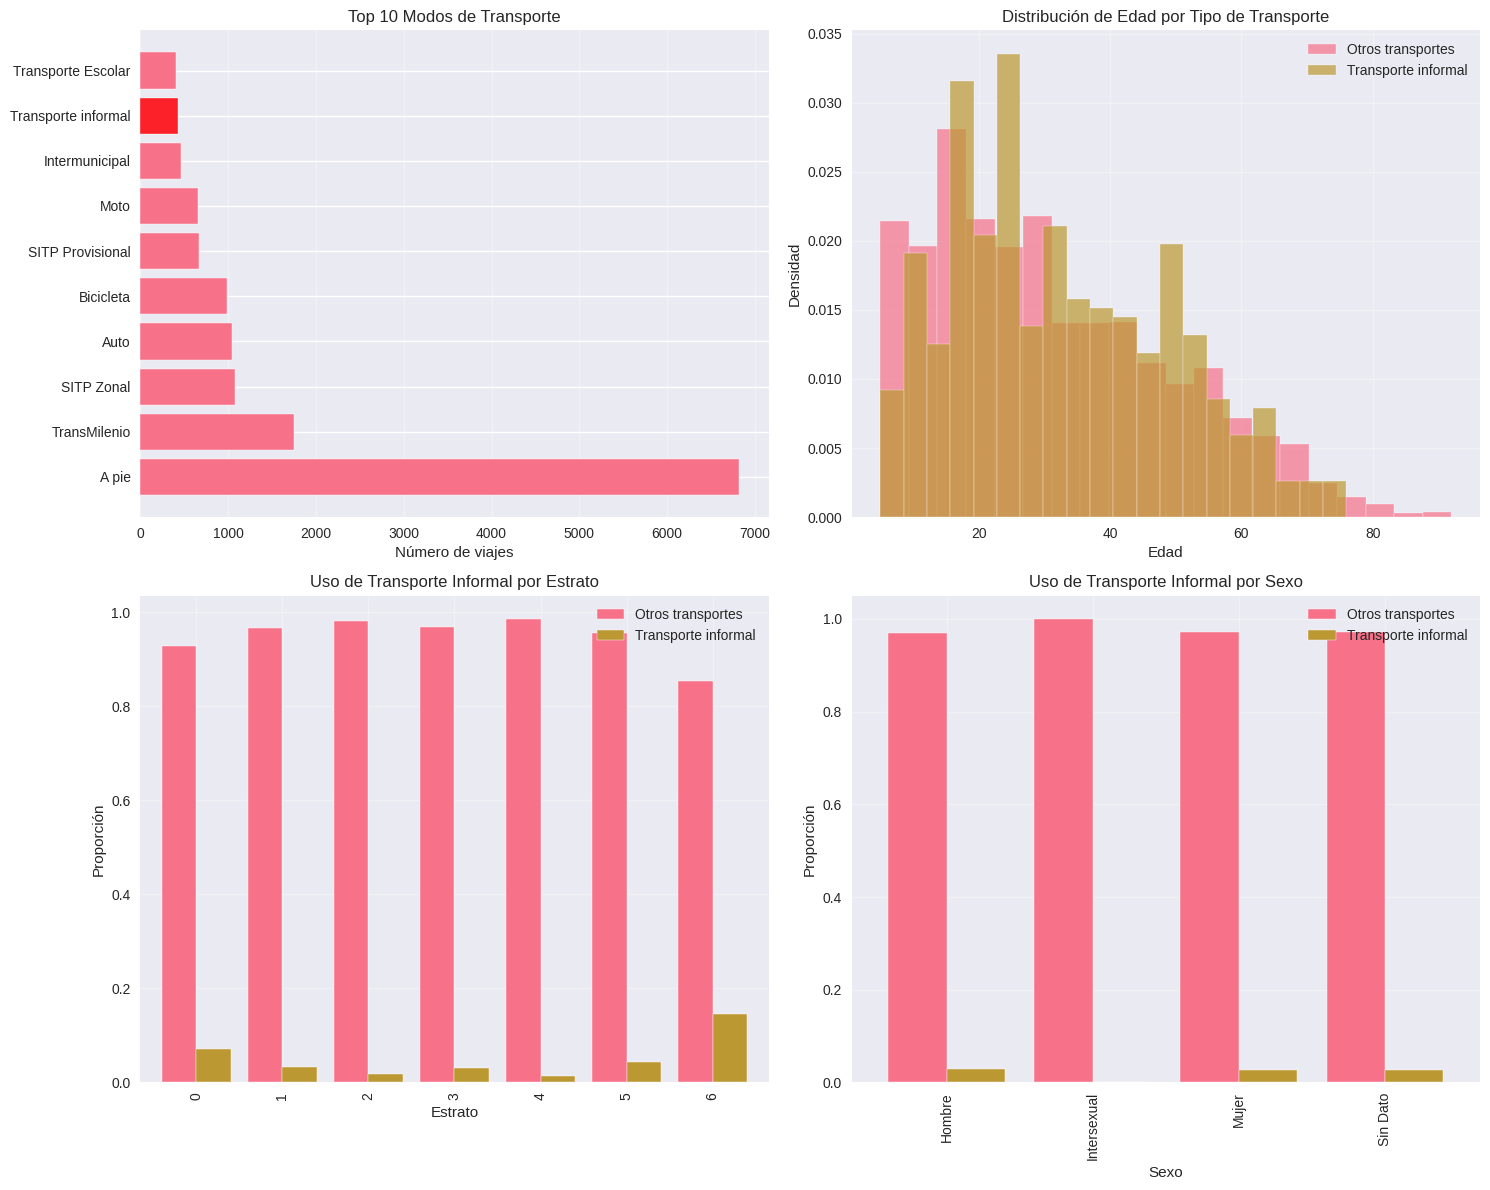

Preparando datos para modelado...
Variables para el modelo: ['Edad', 'Estrato', 'CantidadHogares', 'TotalPersonas', 'TotalVehiculos', 'NivelEducativo_encoded', 'Sexo_encoded', 'RangoIngresos_encoded', 'Municipio_encoded', 'Localidad_encoded']
Datos limpios: (15237, 11)


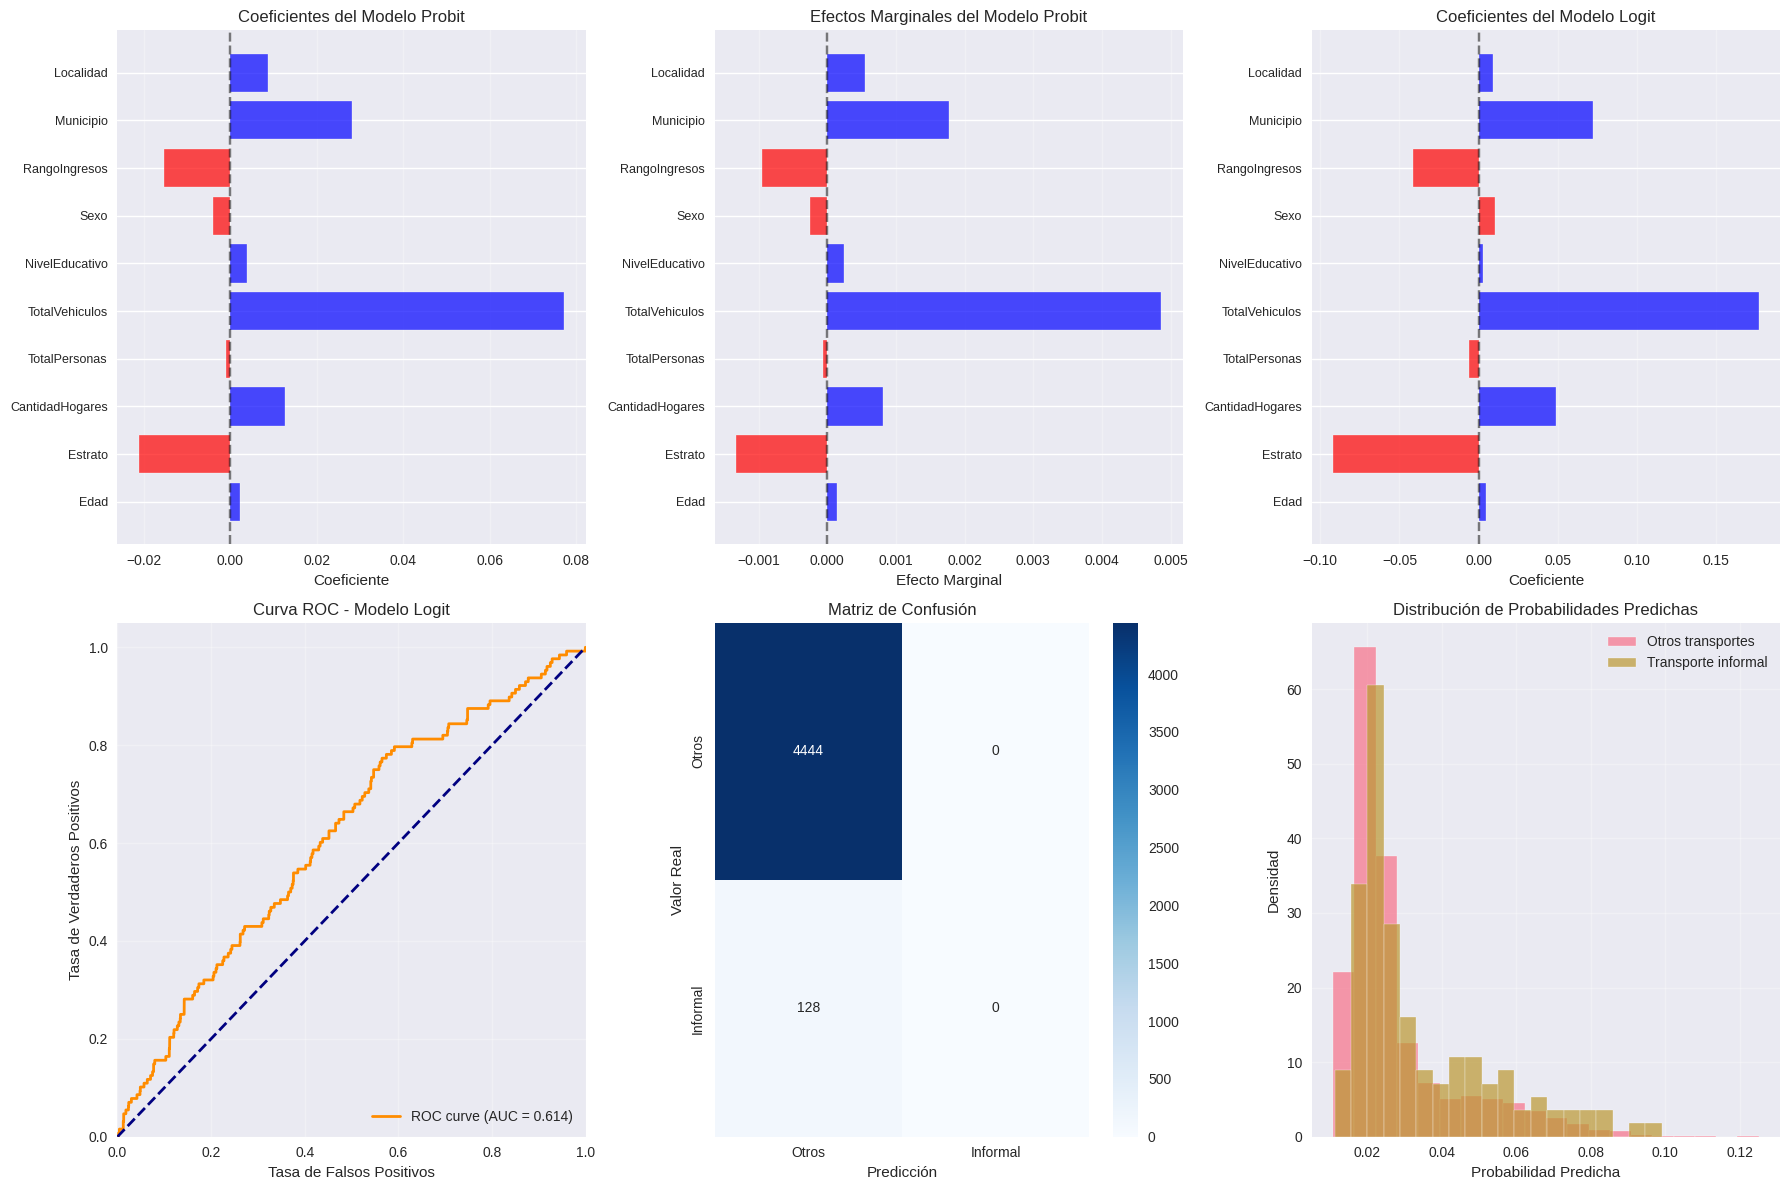

Generando análisis comparativo...


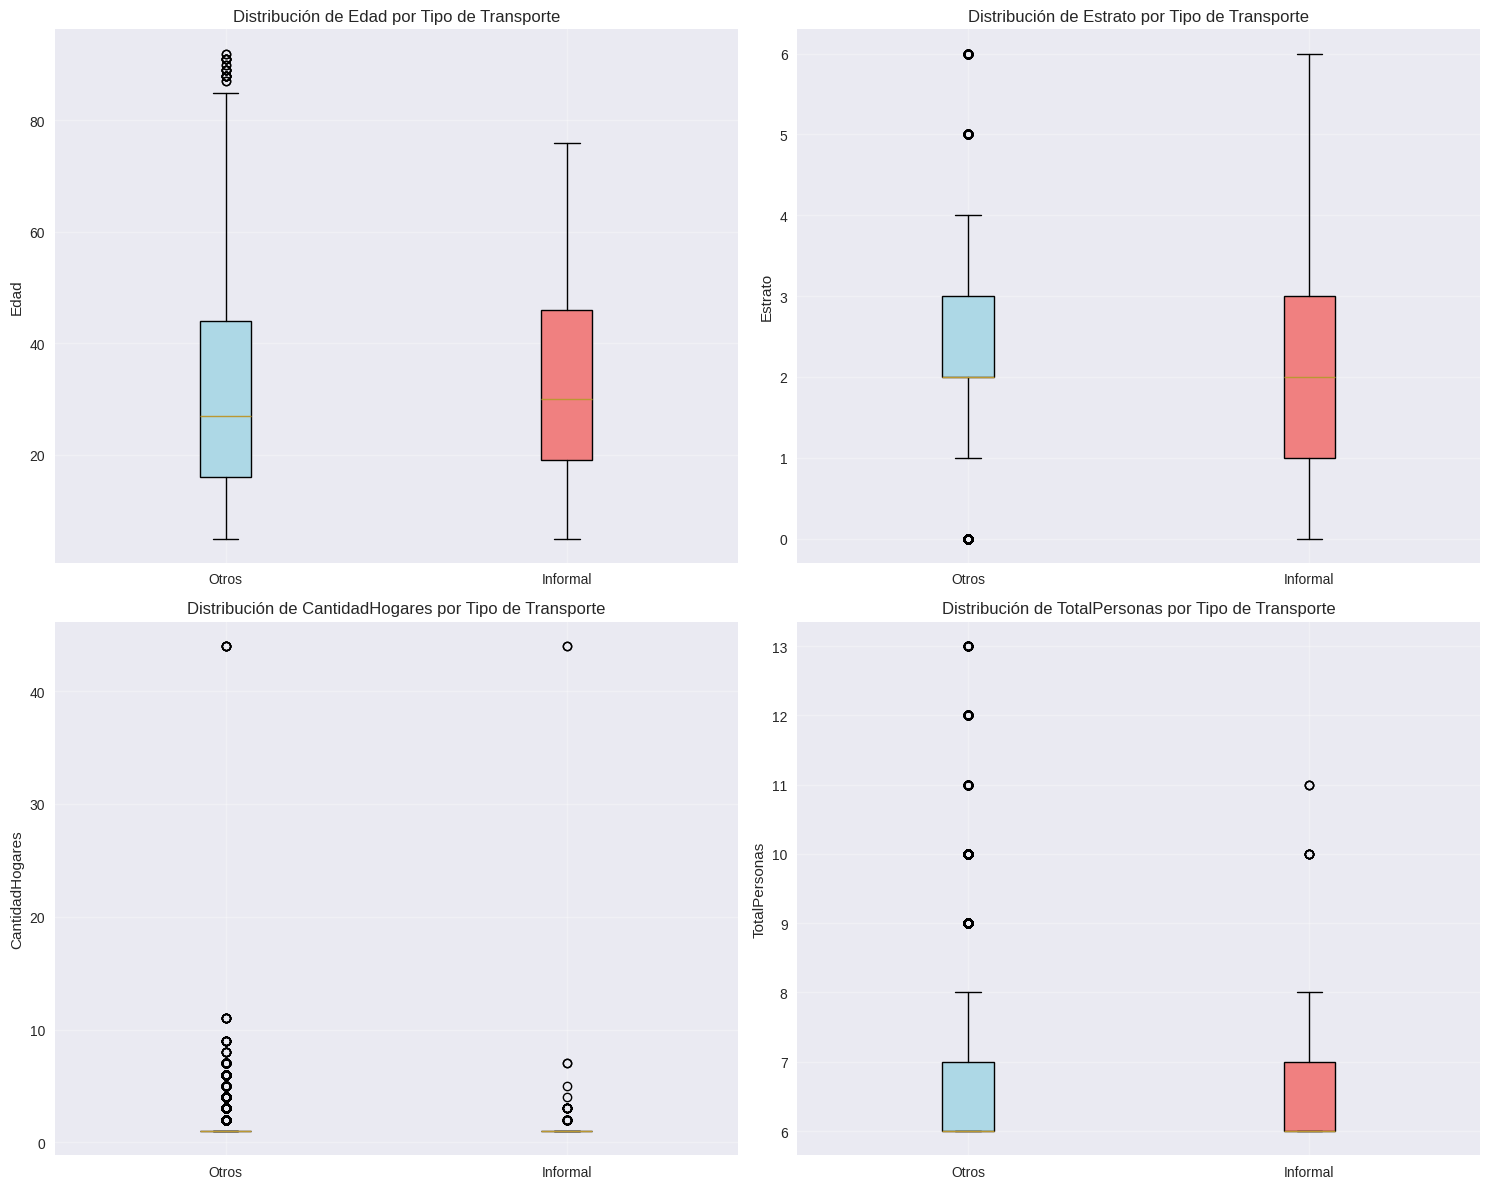


RESUMEN DE RESULTADOS DE MODELOS

MODELO PROBIT:
Pseudo R-cuadrado: 0.0254
Log-Likelihood: -1901.28
AIC: 3824.56
BIC: 3908.51

MODELO LOGIT:
Accuracy: 0.9720
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.6138

VARIABLES MÁS IMPORTANTES (basado en coeficientes absolutos):
       Variable  Coef_Probit  Coef_Logit
 TotalVehiculos     0.077261    0.176920
      Municipio     0.028183    0.071953
        Estrato     0.021124    0.091820
  RangoIngresos     0.015209    0.041581
CantidadHogares     0.012777    0.049047
      Localidad     0.008648    0.009065
           Sexo     0.003998    0.010393
 NivelEducativo     0.003967    0.002543
           Edad     0.002328    0.004554
  TotalPersonas     0.000982    0.006365

TESTS ESTADÍSTICOS:
Edad: t-stat=1.606, p-value=0.1082 
Estrato: t-stat=-2.673, p-value=0.0075 **
CantidadHogares: t-stat=-0.058, p-value=0.9535 
TotalPersonas: t-stat=-0.557, p-value=0.5777 
TotalVehiculos: t-stat=2.405, p-value=0.0162 *

CONCLUSIONES:
- *** 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
print("Cargando datos...")
df = pd.read_csv('/content/Cluster0_Vf.csv', encoding='latin-1', sep=';')
print(f"Dataset cargado: {df.shape}")

# Crear variable dependiente
df['TransporteInformal'] = (df['ModoPrincipal'].str.contains('informal', case=False, na=False)).astype(int)

print("Creando visualizaciones...")

# 1. ANÁLISIS DESCRIPTIVO
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución de modos de transporte
modo_counts = df['ModoPrincipal'].value_counts().head(10)
axes[0, 0].barh(range(len(modo_counts)), modo_counts.values)
axes[0, 0].set_yticks(range(len(modo_counts)))
axes[0, 0].set_yticklabels(modo_counts.index, fontsize=10)
axes[0, 0].set_xlabel('Número de viajes')
axes[0, 0].set_title('Top 10 Modos de Transporte')
axes[0, 0].grid(axis='x', alpha=0.3)

# Highlighting transporte informal
for i, modo in enumerate(modo_counts.index):
    if 'informal' in modo.lower():
        axes[0, 0].barh(i, modo_counts.iloc[i], color='red', alpha=0.7)

# Distribución por edad
if 'Edad' in df.columns:
    df_edad = df.groupby('TransporteInformal')['Edad'].apply(list)
    axes[0, 1].hist(df_edad[0], bins=20, alpha=0.7, label='Otros transportes', density=True)
    axes[0, 1].hist(df_edad[1], bins=20, alpha=0.7, label='Transporte informal', density=True)
    axes[0, 1].set_xlabel('Edad')
    axes[0, 1].set_ylabel('Densidad')
    axes[0, 1].set_title('Distribución de Edad por Tipo de Transporte')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

# Distribución por estrato
if 'Estrato' in df.columns:
    estrato_cross = pd.crosstab(df['Estrato'], df['TransporteInformal'], normalize='index')
    estrato_cross.plot(kind='bar', ax=axes[1, 0], width=0.8)
    axes[1, 0].set_xlabel('Estrato')
    axes[1, 0].set_ylabel('Proporción')
    axes[1, 0].set_title('Uso de Transporte Informal por Estrato')
    axes[1, 0].legend(['Otros transportes', 'Transporte informal'])
    axes[1, 0].grid(alpha=0.3)

# Distribución por sexo
if 'Sexo' in df.columns:
    sexo_cross = pd.crosstab(df['Sexo'], df['TransporteInformal'], normalize='index')
    sexo_cross.plot(kind='bar', ax=axes[1, 1], width=0.8)
    axes[1, 1].set_xlabel('Sexo')
    axes[1, 1].set_ylabel('Proporción')
    axes[1, 1].set_title('Uso de Transporte Informal por Sexo')
    axes[1, 1].legend(['Otros transportes', 'Transporte informal'])
    axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2. PREPARACIÓN DE DATOS PARA MODELADO
print("Preparando datos para modelado...")

# Codificar variables categóricas
le_dict = {}
df_model = df.copy()

categorical_vars = []
for col in ['NivelEducativo', 'Sexo', 'RangoIngresos', 'Municipio', 'Localidad']:
    if col in df_model.columns:
        le_dict[col] = LabelEncoder()
        df_model[col + '_encoded'] = le_dict[col].fit_transform(df_model[col].astype(str))
        categorical_vars.append(col + '_encoded')

# Variables numéricas
numeric_vars = []
for col in ['Edad', 'Estrato', 'CantidadHogares', 'TotalPersonas', 'TotalVehiculos']:
    if col in df_model.columns:
        numeric_vars.append(col)

# Combinar variables
all_vars = numeric_vars + categorical_vars
print(f"Variables para el modelo: {all_vars}")

# Limpiar datos
df_clean = df_model[all_vars + ['TransporteInformal']].dropna()
print(f"Datos limpios: {df_clean.shape}")

# 3. AJUSTAR MODELOS
X = df_clean[all_vars]
y = df_clean['TransporteInformal']

# Modelo Probit
X_const = sm.add_constant(X)
probit_model = Probit(y, X_const)
probit_result = probit_model.fit(disp=0)

# Modelo Logit para comparación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
logit_model = LogisticRegression(random_state=42, max_iter=1000)
logit_model.fit(X_train, y_train)

# Predicciones
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]
y_pred = logit_model.predict(X_test)

# 4. VISUALIZACIONES DE MODELOS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 4.1 Coeficientes del modelo Probit
if len(probit_result.params) > 1:
    coef_probit = probit_result.params[1:]  # Excluir constante
    coef_names = [name for name in probit_result.params.index[1:]]

    # Crear nombres más legibles
    readable_names = []
    for name in coef_names:
        if '_encoded' in name:
            readable_names.append(name.replace('_encoded', ''))
        else:
            readable_names.append(name)

    y_pos = np.arange(len(coef_probit))
    colors = ['red' if x < 0 else 'blue' for x in coef_probit]

    axes[0, 0].barh(y_pos, coef_probit, color=colors, alpha=0.7)
    axes[0, 0].set_yticks(y_pos)
    axes[0, 0].set_yticklabels(readable_names, fontsize=9)
    axes[0, 0].set_xlabel('Coeficiente')
    axes[0, 0].set_title('Coeficientes del Modelo Probit')
    axes[0, 0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[0, 0].grid(axis='x', alpha=0.3)

# 4.2 Efectos marginales
try:
    marginal_effects = probit_result.get_margeff()
    marg_coef = marginal_effects.margeff

    axes[0, 1].barh(y_pos, marg_coef, color=colors, alpha=0.7)
    axes[0, 1].set_yticks(y_pos)
    axes[0, 1].set_yticklabels(readable_names, fontsize=9)
    axes[0, 1].set_xlabel('Efecto Marginal')
    axes[0, 1].set_title('Efectos Marginales del Modelo Probit')
    axes[0, 1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[0, 1].grid(axis='x', alpha=0.3)
except:
    axes[0, 1].text(0.5, 0.5, 'Error calculando\nefectos marginales',
                   ha='center', va='center', transform=axes[0, 1].transAxes)

# 4.3 Coeficientes del modelo Logit
coef_logit = logit_model.coef_[0]
axes[0, 2].barh(y_pos, coef_logit, color=colors, alpha=0.7)
axes[0, 2].set_yticks(y_pos)
axes[0, 2].set_yticklabels(readable_names, fontsize=9)
axes[0, 2].set_xlabel('Coeficiente')
axes[0, 2].set_title('Coeficientes del Modelo Logit')
axes[0, 2].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[0, 2].grid(axis='x', alpha=0.3)

# 4.4 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('Tasa de Falsos Positivos')
axes[1, 0].set_ylabel('Tasa de Verdaderos Positivos')
axes[1, 0].set_title('Curva ROC - Modelo Logit')
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(alpha=0.3)

# 4.5 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Valor Real')
axes[1, 1].set_title('Matriz de Confusión')
axes[1, 1].set_xticklabels(['Otros', 'Informal'])
axes[1, 1].set_yticklabels(['Otros', 'Informal'])

# 4.6 Distribución de probabilidades predichas
axes[1, 2].hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='Otros transportes', density=True)
axes[1, 2].hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Transporte informal', density=True)
axes[1, 2].set_xlabel('Probabilidad Predicha')
axes[1, 2].set_ylabel('Densidad')
axes[1, 2].set_title('Distribución de Probabilidades Predichas')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ANÁLISIS COMPARATIVO DE VARIABLES
print("Generando análisis comparativo...")

# Variables numéricas disponibles
numeric_available = [col for col in numeric_vars if col in df.columns]

if len(numeric_available) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, var in enumerate(numeric_available[:4]):
        if i < 4:  # Solo mostrar las primeras 4 variables
            # Boxplot por tipo de transporte
            df_plot = df[[var, 'TransporteInformal']].dropna()

            box_data = [df_plot[df_plot['TransporteInformal'] == 0][var].values,
                       df_plot[df_plot['TransporteInformal'] == 1][var].values]

            box_plot = axes[i].boxplot(box_data, labels=['Otros', 'Informal'], patch_artist=True)
            box_plot['boxes'][0].set_facecolor('lightblue')
            box_plot['boxes'][1].set_facecolor('lightcoral')

            axes[i].set_ylabel(var)
            axes[i].set_title(f'Distribución de {var} por Tipo de Transporte')
            axes[i].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# 6. TABLA DE RESULTADOS
print("\n" + "="*60)
print("RESUMEN DE RESULTADOS DE MODELOS")
print("="*60)

# Resultados del modelo Probit
print("\nMODELO PROBIT:")
print(f"Pseudo R-cuadrado: {probit_result.prsquared:.4f}")
print(f"Log-Likelihood: {probit_result.llf:.2f}")
print(f"AIC: {probit_result.aic:.2f}")
print(f"BIC: {probit_result.bic:.2f}")

# Resultados del modelo Logit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nMODELO LOGIT:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Variables más importantes
print(f"\nVARIABLES MÁS IMPORTANTES (basado en coeficientes absolutos):")
if len(probit_result.params) > 1:
    importance_df = pd.DataFrame({
        'Variable': readable_names,
        'Coef_Probit': abs(coef_probit),
        'Coef_Logit': abs(coef_logit)
    }).sort_values('Coef_Probit', ascending=False)

    print(importance_df.head(10).to_string(index=False))

# Tests estadísticos
print(f"\nTESTS ESTADÍSTICOS:")
for var in numeric_available:
    if var in df.columns:
        group1 = df[df['TransporteInformal'] == 1][var].dropna()
        group2 = df[df['TransporteInformal'] == 0][var].dropna()

        if len(group1) > 5 and len(group2) > 5:
            t_stat, p_value = stats.ttest_ind(group1, group2)
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
            print(f"{var}: t-stat={t_stat:.3f}, p-value={p_value:.4f} {significance}")

print("\n" + "="*60)
print("CONCLUSIONES:")
print("- *** p<0.001, ** p<0.01, * p<0.05")
print("- Variables con coeficientes positivos aumentan la probabilidad de usar transporte informal")
print("- Variables con coeficientes negativos la disminuyen")
print("- Los efectos marginales indican el cambio en probabilidad por unidad de cambio en la variable")
print("="*60)